In [1]:
!pip install simdkalman

In [2]:
import simdkalman
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

# kf라는 변수에다가 칼만필터를 만들어서 저장.
kf = simdkalman.KalmanFilter(
    state_transition = np.array([[1,1],[0,1]]), # hyper parameter
    process_noise = np.diag([0.1, 0.01]),
    observation_model = np.array([[1,0]]),
    observation_noise = 1.0)

# # simulate 100 random walk time series
# rand = lambda: random.normal(size=(100, 200))
# data = np.cumsum(np.cumsum(rand()*0.02, axis=1) + rand(), axis=1) + rand()*3

# # introduce 10% of NaNs denoting missing values
# data[random.uniform(size=data.shape) < 0.1] = np.nan

# # fit noise parameters to data with the EM algorithm (optional)
# kf = kf.em(data, n_iter=10)

# # smooth and explain existing data
# smoothed = kf.smooth(data)
# # predict new data
# pred = kf.predict(data, 15)
# # could be also written as
# # r = kf.compute(data, 15); smoothed = r.smoothed; pred = r.predicted

# import matplotlib.pyplot as plt

# # show the first 3 smoothed time series
# for i in range(3):

#     _, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
#     plt.title("time series %d" % (i+1))

#     x = np.arange(0, data.shape[1])

#     ax1.plot(x, data[i,:], 'b.', label="data")

#     smoothed_obs = smoothed.observations.mean[i,:]
#     obs_stdev = np.sqrt(smoothed.observations.cov[i,:])
#     ax1.plot(x, smoothed_obs, 'r-', label="smoothed")
#     ax1.plot(x, smoothed_obs - obs_stdev, 'k--', label="67% confidence")
#     ax1.plot(x, smoothed_obs + obs_stdev, 'k--')

#     x_pred = np.arange(data.shape[1], data.shape[1]+pred.observations.mean.shape[1])
#     y_pred = pred.observations.mean[i,:]
#     pred_stdev = np.sqrt(pred.observations.cov[i,:])
#     ax1.plot(x_pred, y_pred, 'b-', label="predicted")
#     ax1.plot(x_pred, y_pred + pred_stdev, 'k--')
#     ax1.plot(x_pred, y_pred - pred_stdev, 'k--')
#     ax1.legend()

#     trend = smoothed.states.mean[i,:,1]
#     trend_stdev = np.sqrt(smoothed.states.cov[i,:,1,1])
#     ax2.plot(x, trend, 'g-', label="trend")
#     ax2.plot(x, trend - trend_stdev, 'k--', label="67% confidence")
#     ax2.plot(x, trend + trend_stdev, 'k--')

#     trend_pred = pred.states.mean[i,:,1]
#     trend_pred_stdev = np.sqrt(pred.states.cov[i,:,1,1])
#     ax2.plot(x_pred, trend_pred, 'b-', label='predicted')
#     ax2.plot(x_pred, trend_pred + trend_pred_stdev, 'k--')
#     ax2.plot(x_pred, trend_pred - trend_pred_stdev, 'k--')
#     ax2.legend()

#     plt.show()

In [3]:
# simulate 100 random walk time series
rand = lambda: random.normal(size=(100, 200))
data = np.cumsum(np.cumsum(rand()*0.02, axis=1) + rand(), axis=1) + rand()*3

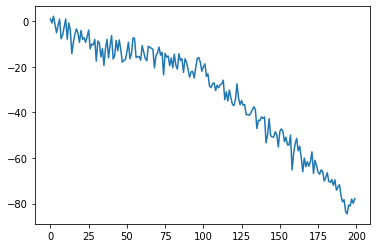

In [4]:
plt.plot(data[0])

In [6]:
# introduce 10% of NaNs denoting missing values
# data라는 변수에 노이즈가 엄청나게 많은 데이터를 저장.
data[random.uniform(size=data.shape) < 0.1] = np.nan

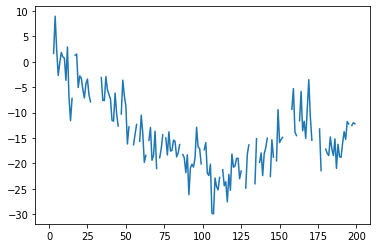

In [12]:
plt.plot(data[2])

In [8]:
# fit noise parameters to data with the EM algorithm (optional)
# 1. 칼만필터를 통해서 분포를 추정. em = estimate
kf = kf.em(data, n_iter=10)

# smooth and explain existing data
# 2. 칼만필터를 통해서 추정한 분포에서, 노이즈를 제거 => smooth
smoothed = kf.smooth(data)
# predict new data
# 3. (optional) 칼만필터를 통해서 추정한 분포로 값을 예측.
pred = kf.predict(data, 15) # 추정된 분포를 가지고 값을 예측하는 것도 가능.
# could be also written as
# r = kf.compute(data, 15); smoothed = r.smoothed; pred = r.predicted

In [9]:
 smoothed.observations.mean # 스무싱 된 값 <= 노이즈가 제거된 데이터.
 smoothed.observations.cov # 스무싱 된 값의 오차범위 (표준편차)

array([[13.36830753, 12.84228875, 12.48443499, ..., 12.54280422,
        12.93005278, 13.50241956],
       [10.0026906 ,  9.50730111,  9.12238052, ...,  8.95050785,
         9.26930324,  9.7672133 ],
       [13.07166739, 12.19428524, 11.61937594, ..., 11.20108939,
        11.61021671, 12.25363481],
       ...,
       [12.22951937, 11.68583116, 11.33431164, ..., 11.32760563,
        11.72466597, 12.33062038],
       [12.85473419, 12.24159369, 11.76288012, ..., 12.34160517,
        12.98711416, 13.79012739],
       [14.03477248, 13.44192362, 13.06747146, ..., 13.93819599,
        14.69147556, 15.80627608]])

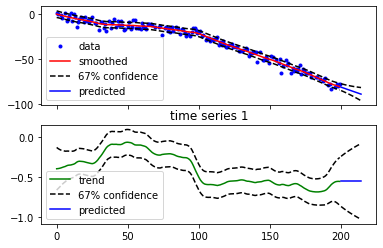

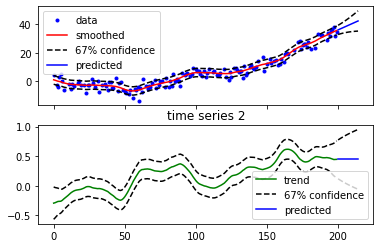

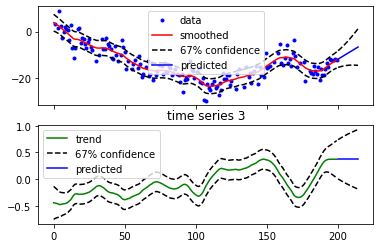

In [10]:
for i in range(3):

    _, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    plt.title("time series %d" % (i+1))

    x = np.arange(0, data.shape[1])

    ax1.plot(x, data[i,:], 'b.', label="data")

    smoothed_obs = smoothed.observations.mean[i,:]
    obs_stdev = np.sqrt(smoothed.observations.cov[i,:])
    ax1.plot(x, smoothed_obs, 'r-', label="smoothed")
    ax1.plot(x, smoothed_obs - obs_stdev, 'k--', label="67% confidence")
    ax1.plot(x, smoothed_obs + obs_stdev, 'k--')

    x_pred = np.arange(data.shape[1], data.shape[1]+pred.observations.mean.shape[1])
    y_pred = pred.observations.mean[i,:]
    pred_stdev = np.sqrt(pred.observations.cov[i,:])
    ax1.plot(x_pred, y_pred, 'b-', label="predicted")
    ax1.plot(x_pred, y_pred + pred_stdev, 'k--')
    ax1.plot(x_pred, y_pred - pred_stdev, 'k--')
    ax1.legend()

    trend = smoothed.states.mean[i,:,1]
    trend_stdev = np.sqrt(smoothed.states.cov[i,:,1,1])
    ax2.plot(x, trend, 'g-', label="trend")
    ax2.plot(x, trend - trend_stdev, 'k--', label="67% confidence")
    ax2.plot(x, trend + trend_stdev, 'k--')

    trend_pred = pred.states.mean[i,:,1]
    trend_pred_stdev = np.sqrt(pred.states.cov[i,:,1,1])
    ax2.plot(x_pred, trend_pred, 'b-', label='predicted')
    ax2.plot(x_pred, trend_pred + trend_pred_stdev, 'k--')
    ax2.plot(x_pred, trend_pred - trend_pred_stdev, 'k--')
    ax2.legend()

    plt.show()